

# Project: Investigate No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

●  ‘No_show’ if the patient showed up to their appointment,and ‘Yes’ if they did not show up. 


## The Research Questions


● How many patients appointment showed vs. not showed ?

● what is the relation between age and patients attendance to his appiontment or not ?

● Is the gender affect for attendance status?

● Is the SMS_received  affect in the attendance?

● what are the most disease that affect for attendance?

● What the relationship between patients who have scholarship and Showed\Not show appointments?

● Is there relationship between missing the appointment and the alcoholism ?

● What the relationship between Neighbourhood and if the patients would come to their appointment or not?

In [1]:
#import all packages that we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load  the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
# Load the data and and print a few lines
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv',sep=';')
df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# show how many rows and column in the dataset
df.shape

(110527, 14)

In [4]:
# Show the dataset statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# finding any null values in the dataset
print(df.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [6]:
# finding any duplicate data in the dataset
print(sum(df.duplicated()))

0


In [7]:
# checking for the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
#Convert ScheduledDay ,AppointmentDay data type from str to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [9]:
# show columns data types
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [10]:
# show the first rows from dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# Modify tz
df['ScheduledDay'] = pd.to_datetime(df.ScheduledDay).dt.tz_localize(None)
df['AppointmentDay'] = pd.to_datetime(df.AppointmentDay).dt.tz_localize(None)

In [12]:
# show the first rows from dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No




### Data Cleaning 

After discussing the structure of the data and any problems that need to be  cleaned, perform those cleaning steps in the second part of this section.


### Removing the unnecessary columns


In [13]:
# Removing unnecessary columns
df.drop(['PatientId','AppointmentID'],axis=1 ,inplace=True)
df.drop(['ScheduledDay','AppointmentDay'],axis=1 ,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Change the letters of some data to lowercase

In [14]:
# show the Neighbourhood values
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [15]:
#change Neighbourhood data to lowercase
df['Neighbourhood'] = df['Neighbourhood'].str.title()
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,Jardim Da Penha,0,1,0,0,0,0,No
1,M,56,Jardim Da Penha,0,0,0,0,0,0,No
2,F,62,Mata Da Praia,0,0,0,0,0,0,No
3,F,8,Pontal De Camburi,0,0,0,0,0,0,No
4,F,56,Jardim Da Penha,0,1,1,0,0,0,No


In [16]:
# show the Neighbourhood values
df.Neighbourhood.value_counts()

Jardim Camburi                 7717
Maria Ortiz                    5805
Resistência                    4431
Jardim Da Penha                3877
Itararé                        3514
                               ... 
Ilha Do Boi                      35
Ilha Do Frade                    10
Aeroporto                         8
Ilhas Oceânicas De Trindade       2
Parque Industrial                 1
Name: Neighbourhood, Length: 81, dtype: int64

### Fixing columns with outliers values

In [17]:
# Show the age statistics
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [18]:
# Find any ages that are less than 0
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

##### We notice in the  age  have value less than 0, which is not possible.

In [19]:
# Drop the row that have age=-1
df.drop(df.query("Age == -1").index,inplace=True)

In [20]:
# show the age value
df.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [21]:
# Checking the Age statistics
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

#### Minimum age became 0 instead of  -1

### Rename some columns

In [22]:
#print the columns name 
for col in df.columns:
    print(col)

Gender
Age
Neighbourhood
Scholarship
Hipertension
Diabetes
Alcoholism
Handcap
SMS_received
No-show


In [23]:
#fixing some columns name
df.rename(columns = {'Hipertension': 'Hypertension'}, inplace = True)
df.rename(columns = {'Handcap': 'Handicap'}, inplace = True)
df.rename(columns = {'No-show':'No_show'}, inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,Jardim Da Penha,0,1,0,0,0,0,No
1,M,56,Jardim Da Penha,0,0,0,0,0,0,No
2,F,62,Mata Da Praia,0,0,0,0,0,0,No
3,F,8,Pontal De Camburi,0,0,0,0,0,0,No
4,F,56,Jardim Da Penha,0,1,1,0,0,0,No


#### Show columns names after modify

### Dividing patients into two groups Showed/Not showed  

In [24]:
# convert str to int 
df.No_show[df['No_show'] == 'Yes'] = '1'
df.No_show[df['No_show'] == 'No'] = '0'
df['No_show'] = pd.to_numeric(df['No_show'])

C:\Users\rawan\AppData\Local\Temp\ipykernel_12568\3106450258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.No_show[df['No_show'] == 'Yes'] = '1'
C:\Users\rawan\AppData\Local\Temp\ipykernel_12568\3106450258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.No_show[df['No_show'] == 'No'] = '0'


In [25]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,Jardim Da Penha,0,1,0,0,0,0,0
1,M,56,Jardim Da Penha,0,0,0,0,0,0,0
2,F,62,Mata Da Praia,0,0,0,0,0,0,0
3,F,8,Pontal De Camburi,0,0,0,0,0,0,0
4,F,56,Jardim Da Penha,0,1,1,0,0,0,0


In [26]:
# Dividing patients into two groups Showed/Not showed and find count them 
showed = df['No_show'] == 0
not_showed = df['No_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed
print(df[showed].count(),df[not_showed].count())

Gender           88207
Age              88207
Neighbourhood    88207
Scholarship      88207
Hypertension     88207
Diabetes         88207
Alcoholism       88207
Handicap         88207
SMS_received     88207
No_show          88207
showed           88207
not_showed       88207
dtype: int64 Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handicap         22319
SMS_received     22319
No_show          22319
showed           22319
not_showed       22319
dtype: int64


In [27]:
# show the mean of showed patients
df[showed].mean()

C:\Users\rawan\AppData\Local\Temp\ipykernel_12568\3002506139.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[showed].mean()


Age             37.790504
Scholarship      0.093904
Hypertension     0.204394
Diabetes         0.073838
Alcoholism       0.030417
Handicap         0.022742
SMS_received     0.291337
No_show          0.000000
showed           1.000000
not_showed       0.000000
dtype: float64

In [28]:
# show the mean of Not showed patients
df[not_showed].mean()

C:\Users\rawan\AppData\Local\Temp\ipykernel_12568\1879441781.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[not_showed].mean()


Age             34.317667
Scholarship      0.115507
Hypertension     0.169004
Diabetes         0.064071
Alcoholism       0.030333
Handicap         0.020297
SMS_received     0.438371
No_show          1.000000
showed           0.000000
not_showed       1.000000
dtype: float64

## General Properties

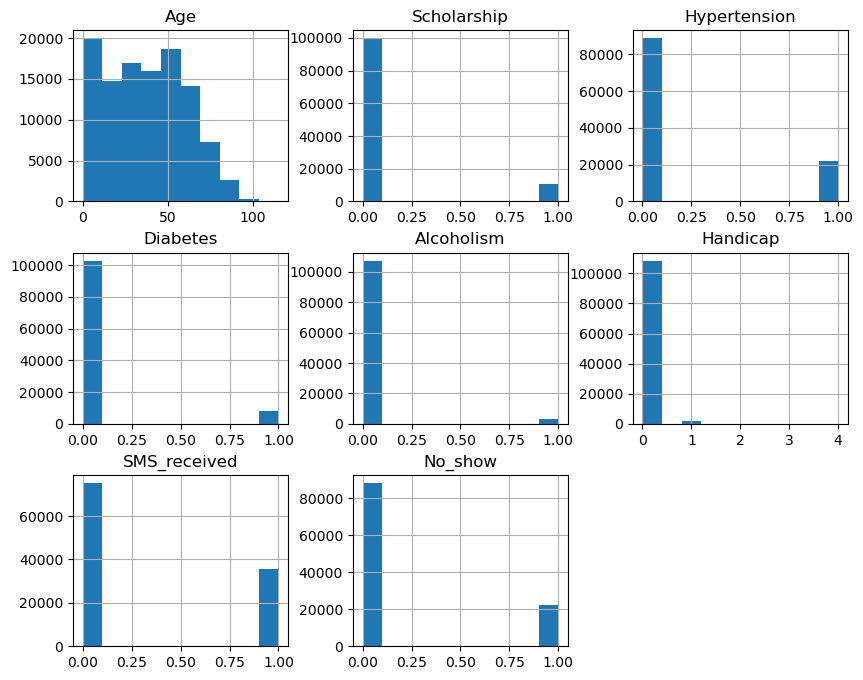

In [29]:
#Show the general features in the dataset
df.hist(figsize=(10,8));

<a id='eda'></a>
## Exploratory Data Analysis

After cleaned data , we now ready to move on to exploration and addressing the research questions that posed in the Introduction section.

### Research Question 1 (How many patients appointment showed vs. not showed ?)

Patients who did showed appointment :88207
 Patients who didn't showed appointment :22319


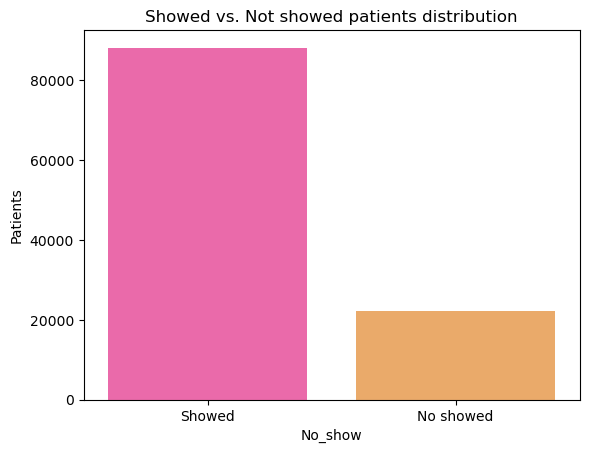

In [30]:
# Plotting showed and not showed Patients distribution
print ("Patients who did showed appointment :{}\n Patients who didn't showed appointment :{}".format(df['No_show'].value_counts()[0], df['No_show'].value_counts()[1]) )
plot_a = sns.countplot(x=df.No_show, data=df ,palette="spring")
plot_a.set_xticklabels(["Showed", "No showed"])
plot_a.set_ylabel("Patients")
plot_a.set_title("Showed vs. Not showed patients distribution")
plt.show()

   #### Show up patients are more than not showed appointment .

### Research Question 2  (what is the relation between age and patients attendance to his appiontment or not ?)

The mean age of showed Patients: 37.790504154999034


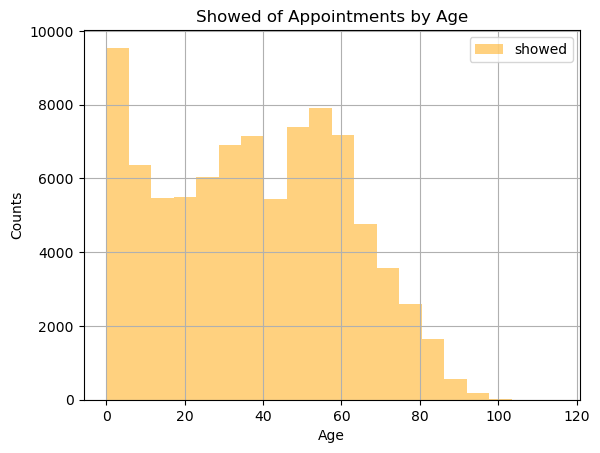

In [31]:
# plot the relationship between age and appointment attendance
print("The mean age of showed Patients:",df.Age[showed].mean())
df.Age[showed].hist(alpha=0.5, bins=20, label='showed',color="orange")
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Showed of Appointments by Age")
plt.legend()

#### Kids and Elderly patients  from 60s to 80s more likely to attend their appointments .

The mean age of  Not showed Patients: 34.31766656212196


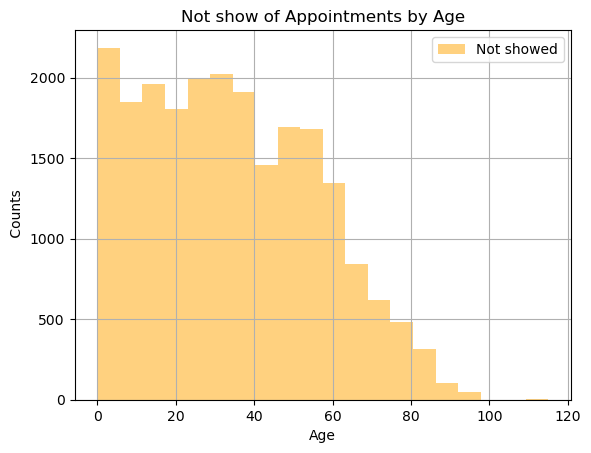

In [32]:
# plot the relationship between age and appointment attendance
print("The mean age of  Not showed Patients:",df.Age[not_showed].mean())
df.Age[not_showed].hist(alpha=0.5, bins=20, label='Not showed',color='orange')
plt.xlabel("Age")
plt.ylabel(" Counts")
plt.title("Not show of Appointments by Age")
plt.legend()

#### The mean age of not showed patients is 34 and as patients get older , they less attend their appointments

### Research Question 3  (Is the gender affect for attendance status?)

In [33]:
# overall number of patients
print("Number of patients by Gender:")
df['Gender'].value_counts()

Number of patients by Gender:


F    71839
M    38687
Name: Gender, dtype: int64

In [34]:
# Number of show/not showed patients by Gender
Gender_N = df.groupby("Gender")["No_show"].value_counts()
print(Gender_N )

Gender  No_show
F       0          57245
        1          14594
M       0          30962
        1           7725
Name: No_show, dtype: int64


<AxesSubplot:title={'center':'Showed Patients by Gender'}, ylabel='Gender'>

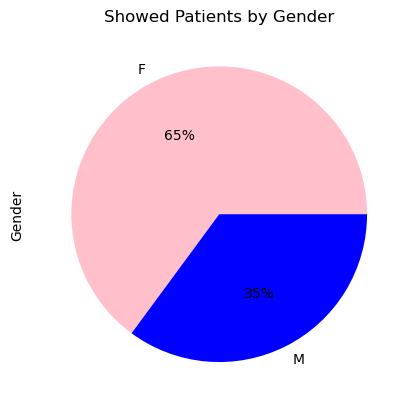

In [35]:

# plot showed patients by Gender 
df.Gender[showed].value_counts().plot(kind='pie', autopct='%1.0f%%',
                                colors = ['pink', 'blue'],
                                title='Showed Patients by Gender')

#### 
Number of female patients more than  the male patients.

Gender not great effect in attendance.

### Research Question 4  (Is the SMS_received  affect in the attendance?)

Showed patients-----------------------------------------:
SMS_received
0    0.832965
1    0.724255
Name: showed, dtype: float64
Not Showed patients-------------------------------------:
SMS_received
0    0.167035
1    0.275745
Name: not_showed, dtype: float64


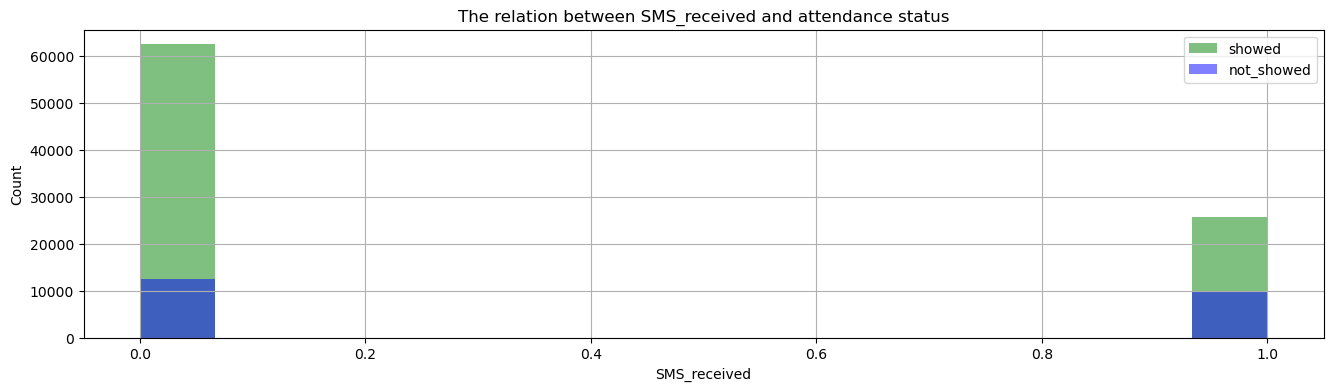

In [38]:

#plotting the relation between SMS_received and attendance status
print("Showed patients-----------------------------------------:")
print(df.groupby('SMS_received')['showed'].mean())
print("Not Showed patients-------------------------------------:")
print(df.groupby('SMS_received')['not_showed'].mean())
def attend(df,col,y,n):
    plt.figure(figsize=[16,4])
    df[col][showed].hist(alpha=.5,bins=15,color='green',label='showed');
    df[col][not_showed].hist(alpha=.5,bins=15,color='blue',label='not_showed');
    plt.legend();
    plt.title('The relation between SMS_received and attendance status')
    plt.xlabel('SMS_received')
    plt.ylabel('Count');
attend(df,'SMS_received',showed,not_showed)

#### Number of patients that show up appointment without receiving SMS is more than showed patients with receiving SMS . 

### Research Question 5  (what are the most disease that affect for attendance?)

Diabetes
0    0.796370
1    0.819967
Name: showed, dtype: float64


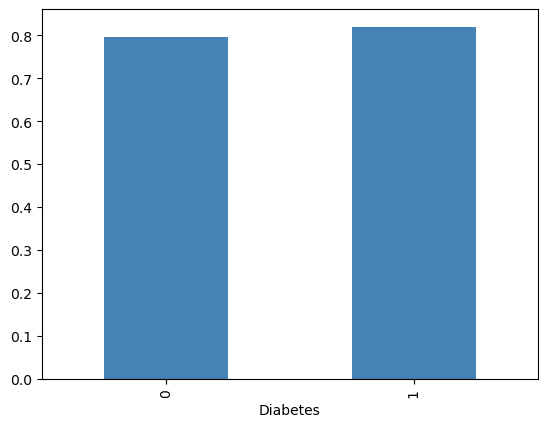

In [39]:
#plotting the most diseases are effect in attendance 
df.groupby(['Diabetes']).showed.mean().plot(kind='bar', color='steelblue')
print(df.groupby(['Diabetes']).showed.mean()) 

Hypertension
0    0.790961
1    0.826980
Name: showed, dtype: float64


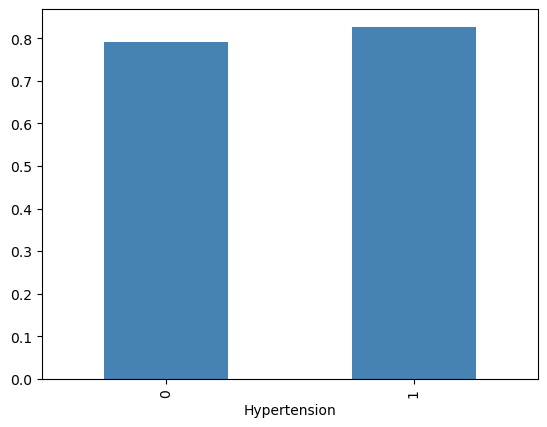

In [40]:
#plotting the most diseases are effect in attendance 
df.groupby(['Hypertension']).showed.mean().plot(kind='bar',color='steelblue');
print(df.groupby(['Hypertension']).showed.mean())

Handicap
0    0.797645
1    0.820764
2    0.797814
3    0.769231
4    0.666667
Name: showed, dtype: float64


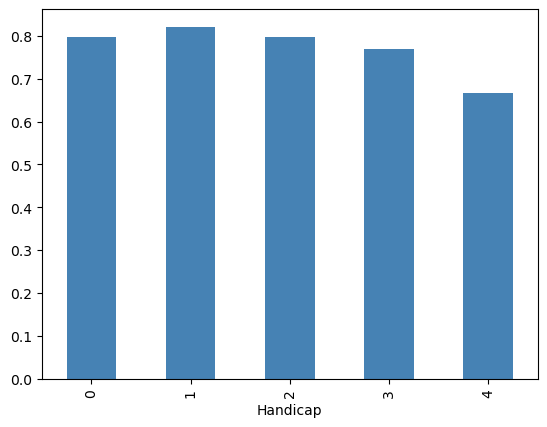

In [41]:
#plotting the most diseases are effect in attendance 
df.groupby(['Handicap']).showed.mean().plot(kind='bar',color='steelblue');
print(df.groupby(['Handicap']).showed.mean())

#### As we can see most of the patients have no: Hypertension , Diabetes and Handicap , so the diseases did not very effect in attendance.

### Research Question 6  (What the relationship between patients who have scholarship and Showed\Not show appointments?)

Scholarship
0    0.801926
1    0.762637
Name: showed, dtype: float64
Scholarship
0    0.198074
1    0.237363
Name: not_showed, dtype: float64


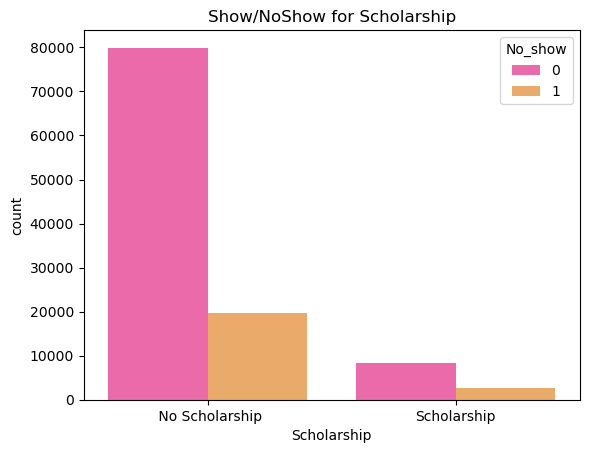

In [42]:
#Plot the relation between patients who have scholarship and Showed\Not showed appointments
print(df.groupby('Scholarship')['showed'].mean())
print(df.groupby('Scholarship')['not_showed'].mean())
plot_b = sns.countplot(x=df.Scholarship, hue=df.No_show, data=df,palette="spring")
plot_b.set_title("Show/NoShow for Scholarship")
x_ticks_labels=[' No Scholarship', 'Scholarship']
plot_b.set_xticklabels(x_ticks_labels)
plt.show()

#### Patients who has Scholarship are most likely to absent their appointments more than the  patients who don't have a scholarship.

### Research Question 7  (Is there relationship between missing the appointment and the alcoholism ?)

 Alcoholism with patients show up their appointments:-----------------------:
0    85524
1     2683
Name: Alcoholism, dtype: int64
 Alcoholism with patients not show their appointments: ---------------------:
0    21642
1      677
Name: Alcoholism, dtype: int64


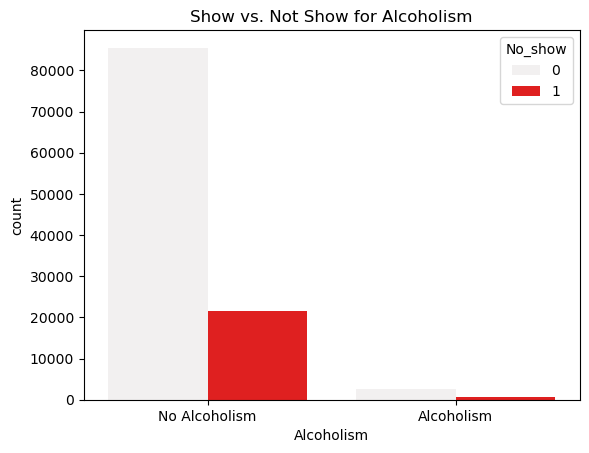

In [45]:
#Plot the relation between Alcoholism and Showed\Not showed appointments
print(" Alcoholism with patients show up their appointments:-----------------------:")
print(df.Alcoholism[showed].value_counts())
print(" Alcoholism with patients not show their appointments: ---------------------:")
print(df.Alcoholism[not_showed].value_counts())
plot_c = sns.countplot(x=df.Alcoholism, hue=df.No_show, data=df,color="red")
plot_c.set_title("Show vs. Not Show for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
plot_c.set_xticklabels(x_ticks_labels)
plt.show()

#### Most patients are not have Alcoholism, and therefore Alcoholism does not great factor to determine if the patient's attendance at his appointment or not .

### Research Question 8  (What the relationship between Neighbourhood and if the patients would come to their appointment or not?)

Jardim Camburi       6252
Maria Ortiz          4586
Resistência          3525
Jardim Da Penha      3246
Santa Martha         2635
                     ... 
Pontal De Camburi      57
Ilha Do Boi            32
Ilha Do Frade           8
Aeroporto               7
Parque Industrial       1
Name: Neighbourhood, Length: 80, dtype: int64


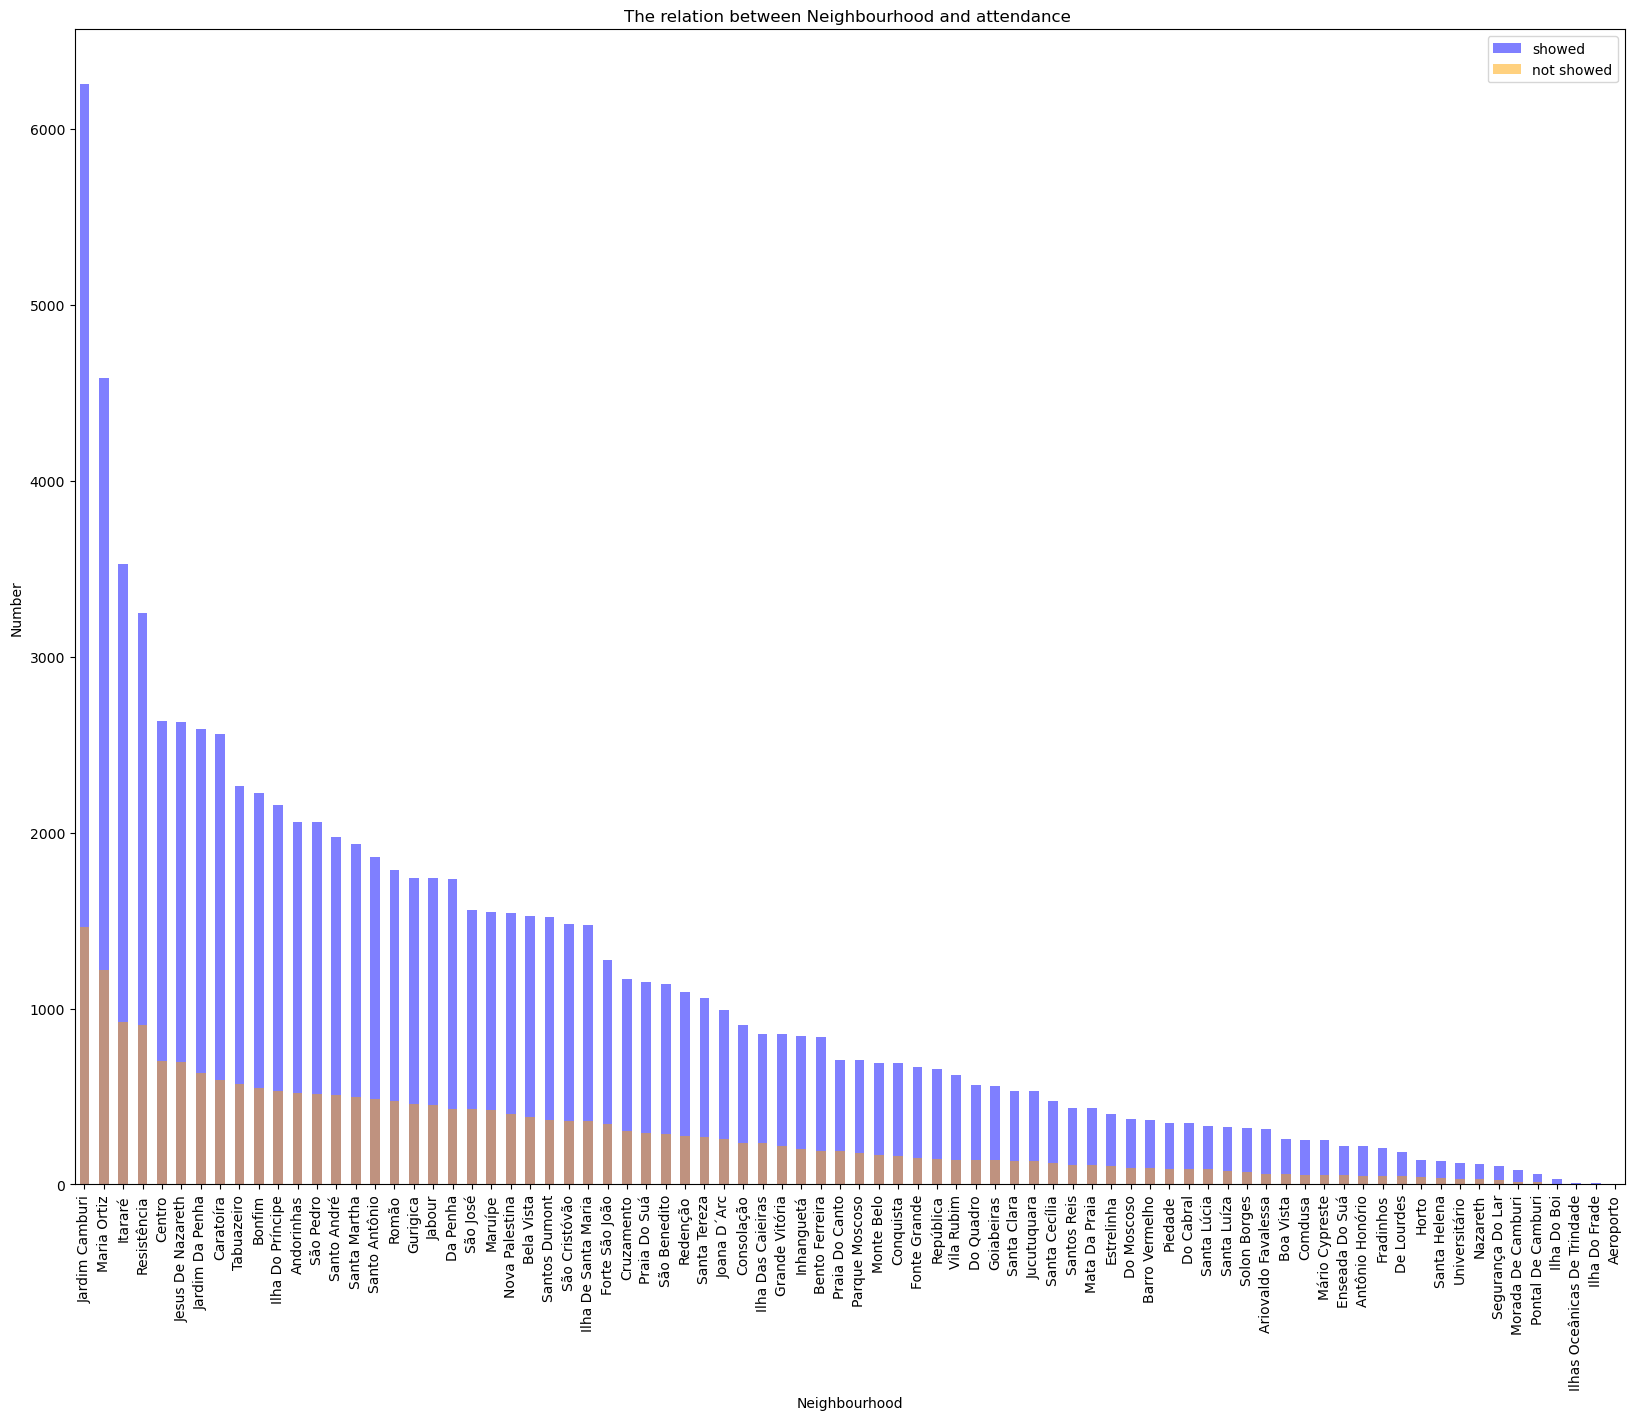

In [46]:
# plot the relation between Neighbourhood and patients who showed and who didn't 
print(df.Neighbourhood[showed].value_counts())
df.Neighbourhood[showed].value_counts().plot(kind='bar',alpha=0.5,figsize=(20,15) ,color= 'blue', label='showed')
df.Neighbourhood[not_showed].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='not showed')
plt.title("The relation between Neighbourhood and attendance ")
plt.xlabel("Neighbourhood")
plt.ylabel("Number")
plt.legend();

#### The number of patients and  appointments show up or not show a are different from one neighbourhood to another, Jardim Camburi  has the greatest number of patients with highest showed\Not show rate.

<a id='conclusions'></a>
## Conclusions

We investigated the correlation between some of the features of the patients and whether it affect in attendance or not . And the results of these analyses are:

● As we can note the number of patients who attended their appointments more than those who were absent.

● As we have noted, age is the most important feature to determine whether the patient will attend or not . The average of age for people who will be most likely to show is 38s , and the average age for people who are not likely to show is 34s.

● There is no correlation between gender and show up on the appointment or didn't.

● Receiving SMS not increase the opportunity of make sure that the patient will come.

● The neighborhoods has significant effect on show up appointments , the neighborhoods with large number of patients they have highest show up appointments rate.

● Most of people who has Scholarship are most likely to didn't show up appointments .

● The features such as Alcoholism and different diseases ('Hypertension','Diabetes','Handicap') is not a great effect on attendance .

## Limitations:

Though there are no null values in the data, The short period of data collected does not give an accurate analysis. It also lacks many details in the data, such as the reason for the patient comes to the doctor, is the patient working or not, which gives an additional explanation for why they absence for the appointments.

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate No Show Appointments .ipynb'])

1